<h3 align="center"><FONT size="7pt">ARTHENA - Data Challenge</FONT></h3>
<br><h3 align="center"><FONT size="5pt">Pierre-Charles Paret-Van Wolput</FONT></h3></br>

### Import and setting part

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Disable warnings on Ipython
import warnings
warnings.filterwarnings('ignore')

#Import random to set the seed
import random

In [198]:
seed = 10

In [146]:
df = pd.read_csv("data.csv", encoding="latin-1")

In [115]:
print(df)

        artist_birth_year  artist_death_year  artist_name artist_nationality  \
0                    1902             1982.0  Wifredo Lam              Cuban   
1                    1902             1982.0  Wifredo Lam              Cuban   
2                    1902             1982.0  Wifredo Lam              Cuban   
3                    1902             1982.0  Wifredo Lam              Cuban   
4                    1902             1982.0  Wifredo Lam              Cuban   
5                    1902             1982.0  Wifredo Lam              Cuban   
6                    1902             1982.0  Wifredo Lam              Cuban   
7                    1902             1982.0  Wifredo Lam              Cuban   
8                    1902             1982.0  Wifredo Lam              Cuban   
9                    1902             1982.0  Wifredo Lam              Cuban   
10                   1902             1982.0  Wifredo Lam              Cuban   
11                   1902             19

In [116]:
df.count()

artist_birth_year        107578
artist_death_year         71186
artist_name              107578
artist_nationality       107578
auction_date             107578
category                 107578
currency                 107578
edition                   13376
estimate_high             68404
estimate_low              68409
hammer_price             101254
location                  89733
materials                105739
measurement_depth_cm     107578
measurement_height_cm    107578
measurement_width_cm     107578
title                    107118
year_of_execution         79818
dtype: int64

### Predicting Hammer Price

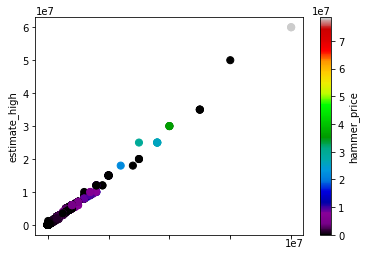

In [117]:
df.plot(kind='scatter', x='estimate_low', y='estimate_high', c='hammer_price', s=50, colormap=plt.cm.spectral);

## Training a predictive model on numerical features

We keep only numerical values at first.

In [118]:
numerical_variables = df.get(['artist_birth_year', 'artist_death_year', 'estimate_high', 'estimate_low', 'auction_date', 'measurement_depth_cm', 'measurement_height_cm', 'measurement_width_cm', 'year_of_execution', 'hammer_price'])

We want to predict hammer_price so the NaNs in hammer_price are not really interesting in the beginning.

In [119]:
numerical_variables_used = numerical_variables[np.isfinite(numerical_variables['hammer_price'])]
numerical_variables_used.count()

artist_birth_year        101254
artist_death_year         68056
estimate_high             62262
estimate_low              62267
auction_date             101254
measurement_depth_cm     101254
measurement_height_cm    101254
measurement_width_cm     101254
year_of_execution         75538
hammer_price             101254
dtype: int64

In [120]:
numerical_variables_used['year_of_execution'] = pd.to_numeric(numerical_variables_used['year_of_execution'], errors='coerce')
numerical_variables_used['auction_date'] = pd.to_datetime(numerical_variables_used['auction_date'])

In [121]:
numerical_variables_used

artist_birth_year  artist_death_year  estimate_high  estimate_low  \
0                    1902             1982.0            NaN           NaN   
1                    1902             1982.0            NaN           NaN   
2                    1902             1982.0            NaN           NaN   
3                    1902             1982.0            NaN           NaN   
4                    1902             1982.0         2500.0        1500.0   
6                    1902             1982.0            NaN           NaN   
7                    1902             1982.0        40000.0       30000.0   
8                    1902             1982.0        12000.0       10000.0   
9                    1902             1982.0            NaN           NaN   
11                   1902             1982.0        22000.0       18000.0   
12                   1902             1982.0        25000.0       20000.0   
13                   1902             1982.0            NaN           NaN   
14                   1902             1982.0            NaN           NaN   
15                   1902             1982.0            NaN           NaN   
16                   1902             1982.0            NaN           NaN   
17                   1902             1982.0            NaN           NaN   
18                   1902             1982.0            NaN           NaN   
19                   1902             1982.0        15000.0       12000.0   
20                   1902             1982.0        35000.0       25000.0   
21                   1902             1982.0            NaN           NaN   
22                   1902             1982.0            NaN           NaN   
23                   1902             1982.0            NaN           NaN   
24                   1902             1982.0            NaN           NaN   
25                   1902             1982.0        21000.0       21000.0   
26                   1902             1982.0            NaN           NaN   
28                   1902             1982.0            NaN           NaN   
29                   1902             1982.0            NaN           NaN   
30                   1902             1982.0            NaN           NaN   
31                   1902             1982.0            NaN           NaN   
32                   1902             1982.0            NaN           NaN   
...                   ...                ...            ...           ...   
107544               1969                NaN        30000.0       20000.0   
107545               1969                NaN        10000.0        8000.0   
107546               1969                NaN         6000.0        4000.0   
107547               1969                NaN         4000.0        3000.0   
107548               1969                NaN         5000.0        5000.0   
107549               1969                NaN        20000.0       15000.0   
107550               1969                NaN         2000.0        1000.0   
107551               1969                NaN        15000.0       10000.0   
107552               1969                NaN        12000.0        8000.0   
107553               1969                NaN        12000.0        8000.0   
107554               1969                NaN        12000.0        8000.0   
107555               1969                NaN         2500.0        1800.0   
107556               1969                NaN         2500.0        1500.0   
107557               1969                NaN          750.0         500.0   
107558               1969                NaN        15000.0       10000.0   
107559               1969                NaN         7000.0        5000.0   
107560               1969                NaN        20000.0       15000.0   
107562               1969                NaN        10000.0        7000.0   
107563               1969                NaN         3000.0        2000.0   
107564               1969                NaN         6000.0        4000.0   
1075

In [122]:
numerical_variables_used_full_finite = numerical_variables_used.dropna()

### Preprocessing on numerical data

In [123]:
from sklearn import preprocessing

In [124]:
labels = numerical_variables_used_full_finite['hammer_price']
features = numerical_variables_used_full_finite.drop(['auction_date','hammer_price'], axis=1)

In [125]:
X_scaled = preprocessing.scale(X_train)

In [126]:
from sklearn.cross_validation import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(features , labels , test_size = 0.05)

#### Idea_1: linear regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
reg = LinearRegression()

In [149]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
reg.score(X_test,Y_test)

0.71727791835731736

#### Idea 2 : Random-Forest Regression

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
reg = RandomForestRegressor(random_state = seed)

In [217]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [218]:
reg.score(X_test,Y_test)

0.89458307991759767

In [221]:
reg.feature_importances_

array([ 0.07880563,  0.07640032,  0.34278322,  0.40401766,  0.00592091,
        0.03393894,  0.0228492 ,  0.03528412])

#### Idea 3: MLP Regression

In [135]:
from sklearn.neural_network import MLPRegressor

In [199]:
reg = MLPRegressor(random_state = seed)

In [200]:
reg.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [201]:
reg.score(X_test, Y_test)

0.74075208962532568

## Answer to questions